In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Logistic Regression

In this notebook, we break down the the Logistic Regression algorithm. **Logistic Regression** is a commonly used machine learning model for binary prediction problems that have classes of `0` and `1`.

### Similiarities to Linear Regression

At first, Logistic Regression behaves exactly like Linear Regression, in that:
1. We receive a matrix `X` with m rows and n columns. 
2. We receive an array `Y` with m rows and 1 column.
3. We initialize an array of weights `W`, or coefficients, with a shape of (n,1)
4. We have a scaler value `b`, or our intercept.

Another shared quality is that to aquire predictions we first follow the formula of linear regression exactly. 
> ie, we  multiply the weight vector by the X matrix and add the intercept $Z = WX + b$

### The Sigmoid Function

But this is where things begin to change. The goal of Logistic Regression is to predict either a `0` or a `1`. If we were follow the prediction formula of Linear Regression, we could end up with an array of real numbers. So instead what we do is plug the output of the linear formula into the `sigmoid function` $\sigma$.

**The sigmoid function** looks like this:

$A_i = \sigma(Z_i) = \frac{1}{1+ e^{-Z_i}}$

In [174]:
def sigmoid(z):
    return 1/(1+np.e**-z)

The way this function works, if $Z_i$ is a very large number, the term $e^{-Z_i}$ in the denominator begins to approach 0, at which point the equation becomes $\frac{1}{1 + 0} = 1$. 

In [177]:
# When the input is large
# the sigmoid function outputs 1
sigmoid(1000)

1.0

If $Z_i$ is a very small number, the term ${e^{-Z}}$ results in a large number which increases the size of the denominator beyond the numerator and results in a small float value. Ultimately, these become probabilities between 0 and 1 and are quite effective at predicting binary targets.

In [179]:
# When the input is small
# the sigmoid function output approaches 0
sigmoid(-100)

3.7200759760208555e-44

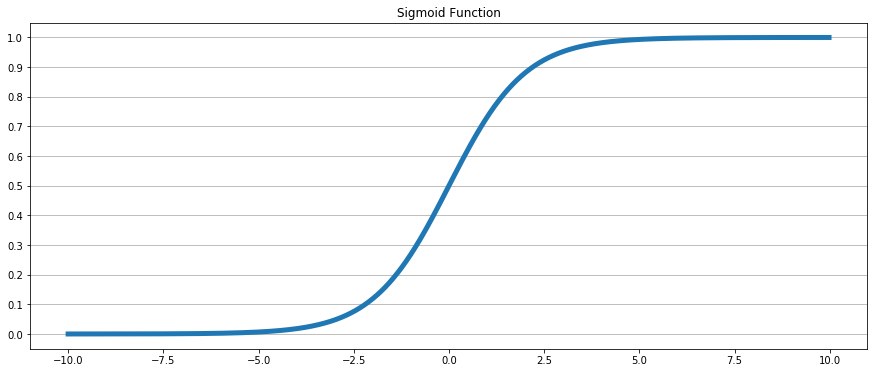

In [225]:
x = np.arange(-10, 10, .02)
y = [sigmoid(val) for val in x]
plt.figure(figsize=(15,6))
plt.plot(x,y, lw=5)
plt.yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
plt.grid(axis='y')
plt.title('Sigmoid Function');

Using the sigmoid function, the output predictions are an array of float values between 0 and 1. To get them into discreet form, the standard convention is to say "if the probability is greater than .5, then we predict `1` else we predict `0`.
> As a side note, this threshold can be adjusted. Sometimes, if the cost of a false prediction for a particular class is large, adjusting this threshold to make it easier or hard to predict 1 is a good idea.

In [235]:
sample = np.random.normal(0, scale=100, size=10)
predicted_probs = [sigmoid(_) for _ in sample]
predictions = [1 if _ > .5 else 0 for _ in predicted_probs]
print('Predicted Probabilities:\n', predicted_probs)
print()
print('Predictions:\n', predictions)

Predicted Probabilities:
 [1.7627568145969998e-48, 4.579566485415477e-127, 1.3925430242884023e-39, 2.2208453822191914e-22, 0.9735283549449385, 1.0, 1.6045423856655449e-21, 1.0, 2.2323376953657544e-45, 0.9999593946940392]

Predictions:
 [0, 0, 0, 0, 1, 1, 0, 1, 0, 1]


### The Cost Function

The **loss function** for logistic regression is:

$\mathcal{L}(y_i, \hat{y_i})= y_ilog(\hat{y_i}) + (1-y_i)log(1-\hat{y_i})$

The **cost function** for logistic regression is:

$\mathcal{J} = \frac{1}{m}\sum_{i=1}^{m}y_ilog(\hat{y_i}) + (1-y_i)log(1-\hat{y_i})$

#### Derivatives
> Finding the partial derivatives for a cost function is not necessary to be a skilled machine learning practicioner. Given that, we will not be breaking down how these derivates are found in this notebook. [This video](https://www.youtube.com/watch?v=0VMK18nphpg) is a decent breakdown for both derivatives if you would like to dig into the calculus. 

The **derivative for the weights vector** `W` is:

$X(Y-\sigma(WX + b))$

The **derivative for the intercept** `b` is:

$\frac{1}{m}\sum_{i=1}^{m}\sigma(w_ix_i + b)-y_i$

# Code Logistic Regression from scratch

Let's create a few functions. 
> Small note: Many of these functions will use `.T`. This returns the [transpose](https://mathinsight.org/matrix_transpose) of a numpy array, and is oftentimes used to make the shapes compatible between two arrays of data. 

1. `predict_proba`
    - This function should:
        1. Receive an `X` matrix, a `W` vector, and a `b` scaler.
        2. Multiply `X` and `W` and add the `b` scaler
        3. Pass the output of the previous step into the sigmoid function, return the result. 

In [ ]:
# STEP A: Receive an X matrix, a W vector, and a b scaler.
def predict_proba(X, W, b):
    # STEP B: Multiply X and W and add the b scaler
    Z = np.dot(W, X.T) + b
    # STEP C: Pass the output of the previous 
    #         step into the sigmoid function,
    #         return the result.
    return 1/(1 + np.exp(-Z))

2. `gradient_descent`
    - This function should
        1. Receive an `X` matrix, a `Y` vector, a `W` vector, `b` scaler, and an `alpha` scaler for the learning rate.
        2. Use the `predict_proba` function to output a vector of probabilities
        3. Calculate the difference between the probabilities and the Y vector
        4. Find the derivative for `W` by multiplying the `X` matrix with output from step C and then dividing by the number of observations in the X matrix
        5. Find the derivative for `b` by calculating the sum of the output from step C and then dividing by the number of observations in `X`.
        6. Update the `W` vector by multiplying `alpha` with the derivative for `W` (step D) and then subtracting that from `W`.
        7. Update `b` by multiplying `alpha` with the derivative for `b` (step E) and then subtracting that from `b`.
        8. Return the updated versions of `W` and `b`.

In [ ]:
# STEP A: Receive an X matrix, a Y vector, 
#         a W vector, b scaler, and an alpha 
#         scaler for the learning rate.
def gradient_descent(X, Y, W, b, alpha=.001):  
    # STEP B: Use the predict_proba function 
    #         to output a vector of probabilities
    A = predict_proba(X, W, b) 
    # STEP C: Calculate the difference between 
    #         the probabilities and the Y vector
    dZ = (A - Y.T).T 
    # STEP D: Find the derivative for W by multiplying the X matrix 
    #         with output from step C and then dividing by the number 
    #         of observations in the X matrix
    dW = np.dot(X.T, dZ)/len(X)
    # STEP E: Find the derivative for b by calculating 
    #         the sum of the output from step C and then 
    #         dividing by the number of observations in X
    db = np.sum(dZ)/len(X)

    # STEP F: Update the W vector by multiplying alpha 
    #         with the derivative for W (step D) 
    #         and then subtracting that from W
    W = W - alpha * dW  
    # STEP G: Update b by multiplying alpha with the 
    #         derivative for b (step E) and then 
    #         subtracting that from b
    b = b - alpha * db
    
    # STEP H: Return the updated versions of W and b
    return W, b

3. `predict`
    - This function should:
        1. Receive an `X` matrix, a `W` vector, a `b` scaler.
        2. Pass all arguments into `predict_proba` to produce probabilities
        3.  Return a list containing 1s where the probability is greater than .5 and 0 if the probability is less than or equal to .5.

In [7]:
# STEP A: Receive an X matrix, a W vector, a b scaler.
def predict(X, W, b, threshold = 0.5): 
    # STEP B: Pass all arguments into predict_proba 
    #         to produce probabilities
    A = predict_proba(X, W, b)
    # STEP C: Return a list containing 1s 
    #         where the probability is greater than .5 
    #         and 0 if the probability is less than or equal to .5.
    Y = np.where(A > threshold, 1, 0) 
    return Y

That is all we need to create a Logistic Regression model!

Let's run our code on some data...

In [6]:
data = make_classification()

X = data[0]
Y = data[1]
W = np.zeros(X.shape[1])
b = 0

iterations = 1000

for i in range(iterations):
    W, b = gradient_descent(X, Y, W, b)

In [10]:
y_hat = predict(X, W, b)
accuracy_score(Y, y_hat)

0.97

What's even better is we could move this code into a `class`. This allows us to more easily access our model, allows the numbers of inputs to our functions to be simpler since we can store variables like `W` as class attributes, and mirrors the sklearn workflow we've become accustomed to. 

In [11]:
class LogisticRegression:
    
    """
    Implementation of Logistic Regression
    
    iterations: The number of iterations
                used in gradient descent to
                reach the minima of the 
                cost function
    
    alpha:      The learning rate used to
                adjust the stepsize proportional
                to the gradient.
                
    
    """
    
    def __init__(self, iterations=1000, alpha=.001):  
        """
        Initialize model hyper parameters
        """
        self.iterations = iterations
        self.alpha = alpha       
        
    def fit(self, X, Y): 
        self.X = X        
        self.Y = Y
        self.b = 0  
        self.m, self.n = X.shape  
        self.W = np.zeros(self.n)        

        for i in range(self.iterations):            
            self.gradient_descent()            
           
    def gradient_descent(self):           
        A = self.predict_proba(self.X)       
        dZ = (A - self.Y.T).T              
        dW = np.dot(self.X.T, dZ)/self.m         
        db = np.sum(dZ)/self.m 
          
        self.W = self.W - self.alpha * dW    
        self.b = self.b - self.alpha * db
        
    def predict_proba(self, X):
        """
        Returns the probability that an observation
        has a class of 1.
        """
        Z = np.dot(self.W, X.T) + self.b
        return 1/(1 + np.exp(-Z))
      
    def predict(self, X , threshold = 0.5): 
        """
        Returns an array of 0's and 1's based on
        the probability threshold
        
        threshold: Default = 0.5 - The threshold used for 
                   determining an obersvation's predicted class.
                   Values that receive a prediction greater than the
                   threshold receive a prediction of 1. 
        """
        A = self.predict_proba(X)   
        Y = np.where(A > threshold, 1, 0) 
        return Y
    
    def score(self, X, y, threshold=0.5):
        """
        Returns the accuracy score for model predictions
        """
        preds = self.predict(X, threshold=threshold)
        return np.sum(preds == np.array(y))/len(preds)

Now we can run our model by creating an instance of the `LogisticRegression` class

In [13]:
my_model = LogisticRegression()
my_model.fit(X, Y)
my_model.score(X, Y)

0.97

Let's compare our model with sklearn's.

In [15]:
from sklearn.linear_model import LogisticRegression as sk_logistic
sk_model = sk_logistic()
sk_model.fit(X, Y)
sk_model.score(X, Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.98